# Pandas and Scikit-learn

Pandas is a Python library that contains high-level data structures and manipulation tools designed for data analysis. Think of Pandas as a Python version of Excel. Scikit-learn, on the other hand, is an open-source machine learning library for Python.

While Scikit-learn does a lot of the heavy lifting, what's equally important is ensuring that raw data is processed in such a way that we are able to 'feed' it to Scikit-learn. Hence, the ability to manipulate raw data with Pandas makes it an indispensible part of our toolkit.

# Kaggle

Kaggle is the leading platform for data science competitions. Participants compete for cash prizes by submitting the best predictive model to problems posted on the competition website.

https://www.kaggle.com/competitions

Learning machine learning via Kaggle problems allows us to take a highly-directed approach because:
1. The problems are well-defined and the data is provided, allowing us to immediately focus on manipulating the data, and
2. The leaderboard allows us to keep track of how well we're doing.

In the following set of exercises, we will be reviewing the data from the Kaggle Titanic competition. Our aim is to make predictions on whether or not specific passengers on the Titanic survived, based on characteristics such as age, sex and class.

# Section 1-0 - First Cut

We will start by processing the training data, after which we will be able to use to 'train' (or 'fit') our model. With the trained model, we apply it to the test data to make the predictions. Finally, we output our predictions into a .csv file to make a submission to Kaggle and see how well they perform.

It is very common to encounter missing values in a data set. In this section, we will take the simplest (or perhaps, simplistic) approach of ignoring the whole row if any part of it contains an NaN value. We will build on this approach in later sections.

## Pandas - Extracting data

First, we load the training data from a .csv file. This is the similar to the data found on the Kaggle website: 

https://www.kaggle.com/c/titanic-gettingStarted/data

In [72]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/train.csv')

## Pandas - Cleaning data

We then review a selection of the data. 

In [73]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We notice that the columns describe features of the Titanic passengers, such as age, sex, and class. Of particular interest is the column Survived, which describes whether or not the passenger survived. When training our model, what we are essentially doing is assessing how each feature impacts whether or not the passenger survived (or if the feature makes an impact at all).

**Exercise**:
- Write the code to review the tail-end section of the data. 

In [74]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We observe that the columns Name, Ticket and Cabin are, for our current purposes, irrelevant. We proceed to remove them from our data set.

In [75]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

Next, we review the type of data in the columns, and their respective counts.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


We notice that the columns Age and Embarked have NaNs or missing values. As previously discussed, we take the approach of simply removing the rows with missing values.

In [77]:
df = df.dropna()

**Question**

- If you were to fill in the missing values, with what values would you fill them with? Why?

Make distributions of the age split between classes and then pick the mean or perhaps value corresponding to the maximum of the distribution.

For the port of embarkation - plot Embarked by Pclass and pick the best matching Embarkation port. 

38.1055434783
29.8776300578
25.1406197183


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bc57b1550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5bc6bb7910>]], dtype=object)

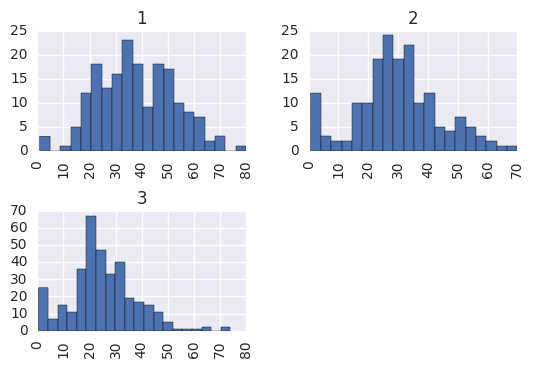

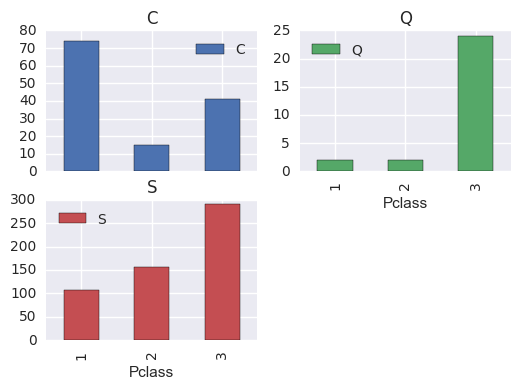

In [87]:
#print(df.Age[0:9])
%matplotlib inline
import matplotlib.pyplot as plt
#age1 = df.Age.plot(kind='hist')
df.hist(column="Age", by = df.Pclass, bins = 20)
print(df[df['Pclass']==1]['Age'].mean())
print(df[df['Pclass']==2]['Age'].mean())
print(df[df['Pclass']==3]['Age'].mean())

#import seaborn as sns
#sns.countplot(y='Embarked', hue='Age', data=df, palette="Greens_d")

#df=df.groupby(['Embarked']).size()
#df=df.unstack()
#df.plot(kind='bar')

ag = df.groupby('Pclass').Embarked.value_counts().sort_index()
#ag.unstack()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2))

Scikit-learn only takes numerical arrays as inputs. As such, we would need to convert the categorical columns Sex and Embarked into numerical ones. We first review the range of values for the column Sex, and create a new column that represents the data as numbers.

In [88]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [89]:
df['Gender'] = df['Sex'].map({'female': 0, 'male':1}).astype(int)

Similarly for Embarked, we review the range of values and create a new column called Port that represents, as a numerical value, where each passenger embarks from.

In [90]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [91]:
df['Port'] = df['Embarked'].map({'C':1, 'S':2, 'Q':3}).astype(int)

**Question**
- What problems might we encounter by mapping C, S, and Q in the column Embarked to the values 1, 2, and 3? In other words, what does the ordering imply? Does the same problem exist for the column Sex?

Now that we have numerical columns that encapsulate the information provided by the columns Sex and Embarked, we can proceed to drop them from our data set.

In [92]:
df = df.drop(['Sex', 'Embarked'], axis=1)

We review the columns our final, processed data set.

In [93]:
cols = df.columns.tolist()
print(cols)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender', 'Port']


For convenience, we move the column Survived to the left-most column. We note that the left-most column is indexed as 0.

In [94]:
cols = [cols[1]] + cols[0:1] + cols[2:]
df = df[cols]

In our final review of our training data, we check that (1) the column Survived is the left-most column (2) there are no NaN values, and (3) all the values are in numerical form.

In [95]:
df.head(10)

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,Port
0,0,1,3,22.0,1,0,7.2500,1,2
1,1,2,1,38.0,1,0,71.2833,0,1
2,1,3,3,26.0,0,0,7.9250,0,2
3,1,4,1,35.0,1,0,53.1000,0,2
4,0,5,3,35.0,0,0,8.0500,1,2
6,0,7,1,54.0,0,0,51.8625,1,2
7,0,8,3,2.0,3,1,21.0750,1,2
8,1,9,3,27.0,0,2,11.1333,0,2
9,1,10,2,14.0,1,0,30.0708,0,1
10,1,11,3,4.0,1,1,16.7000,0,2


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Survived       712 non-null int64
PassengerId    712 non-null int64
Pclass         712 non-null int64
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Gender         712 non-null int64
Port           712 non-null int64
dtypes: float64(2), int64(7)
memory usage: 55.6 KB


Finally, we convert the processed training data from a Pandas dataframe into a numerical (Numpy) array.

In [97]:
train_data = df.values

## Scikit-learn - Training the model

In this section, we'll simply use the model as a black box. We'll review more sophisticated techniques in later sections.

Here we'll be using the Random Forest model. The intuition is as follows: each feature is reviewed to see how much impact it makes to the outcome. The most prominent feature is segmented into a 'branch'. A collection of branches is a 'tree'. The Random Forest model, broadly speaking, creates a 'forest' of trees and aggregates the results.

http://en.wikipedia.org/wiki/Random_forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

We use the processed training data to 'train' (or 'fit') our model. The column Survived will be our second input, and the set of other features (with the column PassengerId omitted) as the first.

The format of the fit command:
fit(X, y, sample_weight=None)

--> X = train_data[0:,2:] -- all rows from 0 to the end, all columns from 2 to the end. 1 = PassengerId and it is omitted
    Y = train_data[0:,0] -- all rows and 0 column = Survived

In [100]:
model = model.fit(train_data[0:,2:], train_data[0:,0])

## Scikit-learn - Making predictions

We first load the test data.

In [101]:
df_test = pd.read_csv('../data/test.csv')

We then review a selection of the data.

In [102]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


We notice that test data has columns similar to our training data, but not the column Survived. We'll use our trained model to predict values for the column Survived.

As before, we process the test data in a similar fashion to what we did to the training data.

In [103]:
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

df_test = df_test.dropna()

df_test['Gender'] = df_test['Sex'].map({'female': 0, 'male':1})
df_test['Port'] = df_test['Embarked'].map({'C':1, 'S':2, 'Q':3})

df_test = df_test.drop(['Sex', 'Embarked'], axis=1)

test_data = df_test.values

We now apply the trained model to the test data (omitting the column PassengerId) to produce an output of predictions.

predict(X) where X : array-like or sparse matrix of shape = [n_samples, n_features]

X = test_data[:,1:] - all rows and columns from 1 = Pclass omittin 0 = PassengerId

In [104]:
output = model.predict(test_data[:,1:])

## Pandas - Preparing for submission

We simply create a Pandas dataframe by combining the index from the test data with the output of predictions.

In [105]:
result = np.c_[test_data[:,0].astype(int), output.astype(int)]
df_result = pd.DataFrame(result[:,0:2], columns=['PassengerId', 'Survived'])

We briefly review our predictions.

In [106]:
df_result.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


Finally, we output our results to a .csv file.

In [108]:
df_result.to_csv('../results/titanic_1-0.csv', index=False)

However, it appears that we have a problem. The Kaggle submission website expects "the solution file to have 418 predictions."

https://www.kaggle.com/c/titanic-gettingStarted/submissions/attach

We compare this to our result.

In [109]:
df_result.shape

(331, 2)

Since we eliminated the rows containing NaNs, we end up with a set of predictions with a smaller number of rows compared to the test data. As Kaggle requires all 418 predictions, we are unable to make a submission.

In this section, we took the simplest approach of ignoring missing values, but fail to produce a complete set of predictions. We look to build on this approach in Section 1-1.